# Setup

In [1]:
!git clone https://github.com/neuspell/neuspell
%cd neuspell

Cloning into 'neuspell'...
remote: Enumerating objects: 686, done.
remote: Counting objects: 100% (489/489), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 686 (delta 302), reused 322 (delta 159), pack-reused 197
Receiving objects: 100% (686/686), 74.44 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (328/328), done.
/content/neuspell


In [2]:
!pip install -e .

Obtaining file:///content/neuspell
     |████████████████████████████████| 2.3MB 2.9MB/s 
     |████████████████████████████████| 1.2MB 16.3MB/s 
     |████████████████████████████████| 133kB 20.3MB/s 
     |████████████████████████████████| 3.3MB 22.3MB/s 
     |████████████████████████████████| 901kB 33.5MB/s 
     |████████████████████████████████| 133kB 37.4MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 7.6MB 34.3MB/s 
ERROR: botocore 1.20.78 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuspell


In [3]:
!pip install urllib3==1.25.4

     |████████████████████████████████| 133kB 2.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 1.9MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp37-none-any.whl size=79979 sha256=d9a8892dc76ec6d5680266b17a98da6a04d924910691ccb2539733da98ec5bbd
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [5]:
!pip install -r extras-requirements.txt

Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 1))
Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 2))
     |████████████████████████████████| 522kB 2.9MB/s 
     |████████████████████████████████| 266kB 11.9MB/s 
     |████████████████████████████████| 122kB 11.9MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=719b1a257e18fb16e286688b0715559da6dca5df47970db4d19a4f0b108d0666
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388773 sha256=7632d38c008ae9d71fcdb04698ebd7f8edf581f6bb75acadbbbdd6d49672c7d5
  Stored in directory: /root/.cache/pip/wheels/26/7a/37/7dbcc30a6b4efd17b91ad1f0128b7bbf84813bd4e1cfb8c1e3
Successfully built overrides jsonnet
ERROR: allennlp 1.5.0 has requirement torch<1.8.0,>=1.6.0, but you'll have torch 1.8.1+cu101 which is i

In [6]:
!pip install torch==1.6.0

     |████████████████████████████████| 748.8MB 23kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: allennlp 1.5.0 has requirement transformers<4.3,>=4.1, but you'll have transformers 4.6.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [7]:
!pip install transformers==4.1

     |████████████████████████████████| 1.5MB 2.1MB/s 
     |████████████████████████████████| 2.9MB 67.2MB/s 
  Found existing installation: tokenizers 0.10.2
    Uninstalling tokenizers-0.10.2:
      Successfully uninstalled tokenizers-0.10.2
  Found existing installation: transformers 4.6.1
    Uninstalling transformers-4.6.1:
      Successfully uninstalled transformers-4.6.1


In [8]:
%cd data/traintest

import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

def create_paths(path_: str):
    if not os.path.exists(path_):
        os.makedirs(path_)
        print(f"{path_} created")
    else:
        print(f"{path_} already exists")


download_file_from_google_drive('1ZlEQKf3HMMk66F7DGFPnh-PA2cbt5K0F', 'test.1blm')
download_file_from_google_drive('1wZ6nrIYANNN3ZoHgacIg9P3UmHnBb9Wa', 'test.1blm.noise.prob')



download_file_from_google_drive('10VtrEThrDIiuFJf0gj4LeGDdP-y-yR--', 'test.bea60k')
download_file_from_google_drive('16AMIb6FVltgRR8xv8h7qacDUX8cOQK9d', 'test.bea60k.noise')

download_file_from_google_drive('1jHR2f3JwnskDphQcaTXr0hLlp60qJxUl', 'test.jfleg')
download_file_from_google_drive('1sccH7dRhyctKAIQXBZEBmUWEiTN_-o6q', 'test.jfleg.noise')



%cd /content/neuspell

/content/neuspell/data/traintest
/content/neuspell


In [9]:
import neuspell

data folder is set to `/content/neuspell/neuspell/../data` script


# Train

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Library

In [11]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
import numpy as np

import time

from neuspell.seq_modeling.helpers import load_data, train_validation_split, batch_accuracy_func
from neuspell.seq_modeling.helpers import get_tokens, progressBar
from neuspell.seq_modeling.helpers import batch_iter, sclstm_tokenize,labelize, tokenize, char_tokenize,bert_tokenize_for_valid_examples

from neuspell.seq_modeling.helpers import load_vocab_dict, save_vocab_dict

import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
#@title helper function
import transformers
def get_pretrained_bert(pretrained_name_or_path=None):
    pretrained_name_or_path = pretrained_name_or_path or DEFAULT_BERT_PRETRAINED_NAME_OR_PATH
    return transformers.AutoModel.from_pretrained(pretrained_name_or_path)

def get_model_nparams(model):
    ntotal = 0
    for param in list(model.parameters()):
        temp = 1
        for sz in list(param.size()): temp *= sz
        ntotal += temp
    return ntotal

from tqdm import tqdm

def untokenize_without_unks(batch_predictions, batch_lengths, vocab, batch_clean_sentences, backoff="pass-through"):
    assert backoff in ["neutral", "pass-through"], print(f"selected backoff strategy not implemented: {backoff}")
    idx2token = vocab["idx2token"]
    unktoken = vocab["token2idx"][vocab["unk_token"]]
    assert len(batch_predictions) == len(batch_lengths) == len(batch_clean_sentences)
    batch_clean_sentences = [sent.split() for sent in batch_clean_sentences]
    if backoff == "pass-through":
        batch_predictions = \
            [" ".join([idx2token[idx] if idx != unktoken else clean_[i] for i, idx in enumerate(pred_[:len_])]) \
             for pred_, len_, clean_ in zip(batch_predictions, batch_lengths, batch_clean_sentences)]
    elif backoff == "neutral":
        batch_predictions = \
            [" ".join([idx2token[idx] if idx != unktoken else "a" for i, idx in enumerate(pred_[:len_])]) \
             for pred_, len_, clean_ in zip(batch_predictions, batch_lengths, batch_clean_sentences)]
    return batch_predictions

def __get_data(inp):
    if isinstance(inp, list):
        data = inp
    elif isinstance(inp, str):
        data = __load_data(inp)
    else:
        raise Exception("arg inp must be either clean_data or a path to fetch clean_data")
    return data

def get_metrics(clean, corrupt, predictions, check_until_topk=1, return_mistakes=False, window=7,
                return_selected_lines=False, selected_lines=None):
    """
    clean: 
        a list of clean sentences, same number of sentences as batch size
        a path to obtain the lines of clean sentences
    corrupt: 
        a list of corrupt sentences, same number of sentences as batch size
        a path to obtain the lines of clean sentences
    predictions:
        is a list of list of lists or
        is a list[list[str]] or 2D numpy array (each of which are tokens from vocab)
            first dimension being batch size
            the second being for ntokens in that sentence 
            the third being for 1 or topk prediction(s) of words
        is a list of sentences
            first dimension being batch size
            the second being for ntokens in that sentence
    check_until_topk:
        compute accuracy, etc. by checking topk words
    """

    clean_data = __get_data(clean)
    corrupt_data = __get_data(corrupt)
    assert len(clean_data) == len(corrupt_data) == len(predictions)

    if isinstance(predictions[0], str):
        predictions = [line.split() for line in predictions]  # to list[list[str]]

    is_correct_prediction = None
    if isinstance(predictions[0][0], str):
        is_correct_prediction = lambda clean_token, corrupt_token: clean_token == corrupt_token
    elif isinstance(predictions[0][0], list):
        is_correct_prediction = lambda clean_token, preds_list: clean_token in preds_list[:check_until_topk]
    else:
        raise Exception("invalid format for predictions")

    if return_mistakes:
        mistakes = []
        # mistakes.append( ("clean_token", "corrupt_token","prediction_tokens","corrupt_context") )

    corr2corr, corr2incorr, incorr2corr, incorr2incorr = 0, 0, 0, 0
    nlines = []
    if selected_lines is not None:
        assert isinstance(selected_lines, dict), print(f"{type(selected_lines)} typefound when expecting type dict")
        print(f"evaluating only for selected lines: {len(selected_lines)}/{len(clean_data)}")
    for i, (clean_line, corrupt_line, predictions_) in enumerate(zip(clean_data, corrupt_data, predictions)):
        if selected_lines is not None:
            if not i in selected_lines:
                continue

        clean_line_tokens, corrupt_line_tokens = clean_line.split(), corrupt_line.split()
        assert len(clean_line_tokens) == len(corrupt_line_tokens)

        # predictions_ can be of a list of shape (len(clean_line_tokens),topk) or a list of
        #   (len(clean_line_tokens),) tokens
        if return_selected_lines:
            if len(clean_line_tokens) != len(predictions_):
                continue
        predictions_ = predictions_[:len(clean_line_tokens)]

        nlines.append(i)
        for i, (clean_token, corrupt_token, prediction_tokens) in enumerate(
                zip(clean_line_tokens, corrupt_line_tokens, predictions_)):
            if clean_token == corrupt_token and is_correct_prediction(clean_token, prediction_tokens):
                corr2corr += 1
            elif clean_token == corrupt_token and not is_correct_prediction(clean_token, prediction_tokens):
                corr2incorr += 1
            elif clean_token != corrupt_token and is_correct_prediction(clean_token, prediction_tokens):
                incorr2corr += 1
            elif clean_token != corrupt_token and not is_correct_prediction(clean_token, prediction_tokens):
                incorr2incorr += 1
                if return_mistakes: \
                        mistakes.append((clean_token,
                                         corrupt_token,
                                         prediction_tokens,
                                         " ".join(corrupt_line_tokens[
                                                  max(i - window, 0):min(i + window + 1, len(corrupt_line_tokens))]))
                                        )

    if return_selected_lines:
        print(f"#lines evaluated: {len(nlines)}/{len(clean_data)}")
        if return_mistakes:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes, nlines
        else:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, nlines
    else:
        if return_mistakes:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes
        else:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr

## Define model

In [13]:
#@title inference
def model_inference(model, data, topk, device, batch_size=16, vocab_=None):
    """
    model: an instance of BertSCLSTM
    data: list of tuples, with each tuple consisting of correct and incorrect 
            sentence string (would be split at whitespaces)
    topk: how many of the topk softmax predictions are considered for metrics calculations
    """
    if vocab_ is not None:
        vocab = vocab_
    print("###############################################")
    inference_st_time = time.time()
    _corr2corr, _corr2incorr, _incorr2corr, _incorr2incorr = 0, 0, 0, 0
    _mistakes = []
    VALID_batch_size = batch_size
    valid_loss = 0.
    valid_acc = 0.
    print("data size: {}".format(len(data)))
    data_iter = batch_iter(data, batch_size=VALID_batch_size, shuffle=False)
    model.eval()
    model.to(device)
    for batch_id, (batch_labels, batch_sentences) in tqdm(enumerate(data_iter)):
        torch.cuda.empty_cache()
        st_time = time.time()
        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(
            batch_labels, batch_sentences)
        if len(batch_labels_) == 0:
            print("################")
            print("Not predicting the following lines due to pre-processing mismatch: \n")
            print([(a, b) for a, b in zip(batch_labels, batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_
            
        batch_bert_inp = {k: v.to(device) for k, v in batch_bert_inp.items()}
        
        # set batch data for others
        batch_labels_ids, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, batch_lengths_ = sclstm_tokenize(batch_sentences, vocab)
        
        assert (batch_lengths_ == batch_lengths).all() == True
        assert len(batch_bert_splits) == len(batch_idxs)
        batch_idxs = [batch_idxs_.to(device) for batch_idxs_ in batch_idxs]
        # batch_lengths = batch_lengths.to(device)
        batch_labels_ids = batch_labels_ids.to(device)
        # forward
        try:
            with torch.no_grad():
                """
                NEW: batch_predictions can now be of shape (batch_size,batch_max_seq_len,topk) if topk>1, else (batch_size,batch_max_seq_len)
                """
                batch_loss, batch_predictions = model(batch_idxs, batch_lengths, batch_bert_inp, batch_bert_splits,
                                                      targets=batch_labels_ids, topk=topk)
        except RuntimeError:
            print(
                f"batch_idxs:{len(batch_idxs)},batch_lengths:{batch_lengths.shape},batch_bert_inp:{len(batch_bert_inp.keys())},batch_labels_ids:{batch_labels_ids.shape}")
            raise Exception("")
            
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels_ids = batch_labels_ids.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        # based on topk, obtain either strings of batch_predictions or list of tokens
        if topk == 1:
            batch_predictions = untokenize_without_unks(batch_predictions, batch_lengths, vocab, batch_sentences)
        else:
            batch_predictions = untokenize_without_unks2(batch_predictions, batch_lengths, vocab, batch_sentences,
                                                         topk=None)
        # corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes = \
        #    get_metrics(batch_labels,batch_sentences,batch_predictions,check_until_topk=topk,return_mistakes=True)
        # _mistakes.extend(mistakes)
        # batch_labels = [line.lower() for line in batch_labels]
        # batch_sentences = [line.lower() for line in batch_sentences]
        # batch_predictions = [line.lower() for line in batch_predictions]
        corr2corr, corr2incorr, incorr2corr, incorr2incorr = \
            get_metrics(batch_labels, batch_sentences, batch_predictions, check_until_topk=topk, return_mistakes=False)
        _corr2corr += corr2corr
        _corr2incorr += corr2incorr
        _incorr2corr += incorr2corr
        _incorr2incorr += incorr2incorr

        # delete
        del batch_loss
        del batch_predictions
        del batch_labels, batch_lengths, batch_idxs, batch_lengths_, batch_bert_inp
        torch.cuda.empty_cache()

        '''
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(data) / VALID_batch_size)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),None,None])
        '''
    print(f"\nEpoch {None} valid_loss: {valid_loss / (batch_id + 1)}")
    print("total inference time for this data is: {:4f} secs".format(time.time() - inference_st_time))
    print("###############################################")
    print("")
    # for mistake in _mistakes:
    #    print(mistake)
    print("")
    print("total token count: {}".format(_corr2corr + _corr2incorr + _incorr2corr + _incorr2incorr))
    print(
        f"_corr2corr:{_corr2corr}, _corr2incorr:{_corr2incorr}, _incorr2corr:{_incorr2corr}, _incorr2incorr:{_incorr2incorr}")
    print(f"accuracy is {(_corr2corr + _incorr2corr) / (_corr2corr + _corr2incorr + _incorr2corr + _incorr2incorr)}")
    print(f"word correction rate is {(_incorr2corr) / (_incorr2corr + _incorr2incorr)}")
    print("###############################################")
    return


In [14]:
#@title BertSCLSTM
class BertSCLSTM(nn.Module):
    def __init__(self, screp_dim, padding_idx, output_dim, early_concat=True,
                 bert_pretrained_name_or_path=None, freeze_bert=False):
        super(BertSCLSTM, self).__init__()

        self.bert_dropout = torch.nn.Dropout(0.2)
        self.bert_model = get_pretrained_bert(bert_pretrained_name_or_path)
        self.bertmodule_outdim = self.bert_model.config.hidden_size
        self.early_concat = early_concat  # if True, (bert+sc)->lstm->linear, else ((sc->lstm)+bert)->linear
        if freeze_bert:
            # Uncomment to freeze BERT layers
            for param in self.bert_model.parameters():
                param.requires_grad = False

        # lstm module
        # expected  input dim: [BS,max_nwords,*] and batch_lengths as [BS] for pack_padded_sequence
        bidirectional, hidden_size, nlayers = True, 512, 2
        if self.early_concat:
            self.lstmmodule_indim = screp_dim + self.bertmodule_outdim
            self.lstmmodule = nn.LSTM(self.lstmmodule_indim, hidden_size, nlayers,
                                      batch_first=True, dropout=0.3, bidirectional=bidirectional)
            self.lstmmodule_outdim = hidden_size * 2 if bidirectional else hidden_size
            self.encodings_outdim = self.lstmmodule_outdim
        else:
            self.lstmmodule_indim = screp_dim
            self.lstmmodule = nn.LSTM(self.lstmmodule_indim, hidden_size, nlayers,
                                      batch_first=True, dropout=0.3, bidirectional=bidirectional)
            self.lstmmodule_outdim = hidden_size * 2 if bidirectional else hidden_size
            self.encodings_outdim = self.lstmmodule_outdim + self.bertmodule_outdim

        # output module
        assert output_dim > 0
        self.dropout = nn.Dropout(p=0.4)
        self.dense = nn.Linear(self.encodings_outdim, output_dim)

        # loss
        # See https://pytorch.org/docs/stable/nn.html#crossentropyloss
        self.criterion = nn.CrossEntropyLoss(reduction='mean', ignore_index=padding_idx)

    @property
    def device(self) -> torch.device:
        return next(self.parameters()).device

    def get_merged_encodings(self, bert_seq_encodings, seq_splits, mode='avg'):
        bert_seq_encodings = bert_seq_encodings[:sum(seq_splits) + 2, :]  # 2 for [CLS] and [SEP]
        bert_seq_encodings = bert_seq_encodings[1:-1, :]
        # a tuple of tensors
        split_encoding = torch.split(bert_seq_encodings, seq_splits, dim=0)
        batched_encodings = pad_sequence(split_encoding, batch_first=True, padding_value=0)
        if mode == 'avg':
            seq_splits = torch.tensor(seq_splits).reshape(-1, 1).to(self.device)
            out = torch.div(torch.sum(batched_encodings, dim=1), seq_splits)
        elif mode == "add":
            out = torch.sum(batched_encodings, dim=1)
        else:
            raise Exception("Not Implemented")
        return out

    def forward(self,
                batch_screps: "list[pad_sequence]",
                batch_lengths: "tensor",
                batch_bert_dict: "{'input_ids':tensor, 'attention_mask':tensor, 'token_type_ids':tensor}",
                batch_splits: "list[list[int]]",
                aux_word_embs: "tensor" = None,
                targets: "tensor" = None,
                topk=1):

        if aux_word_embs is not None:
            raise Exception("dimensions of aux_word_embs not used in __init__()")

        # cnn
        batch_size = len(batch_screps)
        batch_screps = pad_sequence(batch_screps, batch_first=True, padding_value=0)

        # bert
        # BS X max_nsubwords x self.bertmodule_outdim
        bert_encodings = self.bert_model(**batch_bert_dict, return_dict=False)[0]
        bert_encodings = self.bert_dropout(bert_encodings)
        # BS X max_nwords x self.bertmodule_outdim
        bert_merged_encodings = pad_sequence(
            [self.get_merged_encodings(bert_seq_encodings, seq_splits, mode='avg') \
             for bert_seq_encodings, seq_splits in zip(bert_encodings, batch_splits)],
            batch_first=True,
            padding_value=0
        )

        if self.early_concat:

            # concat aux_embs
            # if not None, the expected dim for aux_word_embs: [BS,max_nwords,*]
            intermediate_encodings = torch.cat((batch_screps, bert_merged_encodings), dim=2)
            if aux_word_embs is not None:
                intermediate_encodings = torch.cat((intermediate_encodings, aux_word_embs), dim=2)

            # lstm
            # dim: [BS,max_nwords,*]->[BS,max_nwords,self.lstmmodule_outdim]
            intermediate_encodings = pack_padded_sequence(intermediate_encodings, batch_lengths,
                                                          batch_first=True, enforce_sorted=False)
            lstm_encodings, (last_hidden_states, last_cell_states) = self.lstmmodule(intermediate_encodings)
            lstm_encodings, _ = pad_packed_sequence(lstm_encodings, batch_first=True, padding_value=0)

            # out
            final_encodings = lstm_encodings

        else:

            # concat aux_embs
            # if not None, the expected dim for aux_word_embs: [BS,max_nwords,*]
            intermediate_encodings = batch_screps
            if aux_word_embs is not None:
                intermediate_encodings = torch.cat((intermediate_encodings, aux_word_embs), dim=2)

                # lstm
            # dim: [BS,max_nwords,*]->[BS,max_nwords,self.lstmmodule_outdim]
            intermediate_encodings = pack_padded_sequence(intermediate_encodings, batch_lengths,
                                                          batch_first=True, enforce_sorted=False)
            lstm_encodings, (last_hidden_states, last_cell_states) = self.lstmmodule(intermediate_encodings)
            lstm_encodings, _ = pad_packed_sequence(lstm_encodings, batch_first=True, padding_value=0)

            # out
            final_encodings = torch.cat((lstm_encodings, bert_merged_encodings), dim=2)

        # dense
        # [BS,max_nwords,self.encodings_outdim]->[BS,max_nwords,output_dim]
        logits = self.dense(self.dropout(final_encodings))

        # loss
        if targets is not None:
            assert len(targets) == batch_size  # targets:[[BS,max_nwords]
            logits_permuted = logits.permute(0, 2, 1)  # logits: [BS,output_dim,max_nwords]
            loss = self.criterion(logits_permuted, targets)

        # eval preds
        if not self.training:
            probs = F.softmax(logits, dim=-1)  # [BS,max_nwords,output_dim]
            if topk > 1:
                topk_values, topk_inds = \
                    torch.topk(probs, topk, dim=-1, largest=True,
                               sorted=True)  # -> (Tensor, LongTensor) of [BS,max_nwords,topk]
            elif topk == 1:
                topk_inds = torch.argmax(probs, dim=-1)  # [BS,max_nwords]

            # Note that for those positions with padded_idx,
            #   the arg_max_prob above computes a index because 
            #   the bias term leads to non-uniform values in those positions

            return loss.cpu().detach().numpy(), topk_inds.cpu().detach().numpy()
        return loss

In [15]:
#early_concat False就是sclstm的output和bert的output接在一起

def load_model(vocab, early_concat,bert_pretrained_name_or_path=None):

    model = BertSCLSTM(3*len(vocab["chartoken2idx"]),
                       vocab["token2idx"][ vocab["pad_token"] ],
                       len(vocab["token_freq"]),
                       early_concat=early_concat, 
                       bert_pretrained_name_or_path = bert_pretrained_name_or_path)
    #print(model)
    print( get_model_nparams(model) )

    return model

## Load data

In [19]:
train_data = load_data('/content/neuspell/data/traintest/','test.1blm','test.1blm.noise.prob')

train_data, valid_data = train_validation_split(train_data, 0.90, seed=1)

vocab_ref = {}

vocab = get_tokens([i[0] for i in train_data],
                           keep_simple=True,
                           min_max_freq=(2,float("inf")),
                           topk=100000,
                           intersect=vocab_ref,
                           load_char_tokens=True)

test_data_60k = load_data('/content/neuspell/data/traintest/','test.bea60k','test.bea60k.noise')
test_data_jfleg = load_data('/content/neuspell/data/traintest/','test.jfleg','test.jfleg.noise')

273134it [00:00, 412549.34it/s]
273134it [00:00, 1413122.40it/s]
  0%|          | 0/245821 [00:00<?, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


100%|██████████| 245821/245821 [00:01<00:00, 173501.25it/s]


Total tokens found: 155272


  0%|          | 0/245821 [00:00<?, ?it/s]

Total tokens retained: 139243
Total tokens retained: 67965
Total tokens retained: 67965
loading character tokens


100%|██████████| 245821/245821 [00:01<00:00, 230454.83it/s]
63044it [00:00, 480442.06it/s]
0it [00:00, ?it/s]

number of unique chars found: 98
{'<<CHAR_UNK>>': 0, '<<CHAR_PAD>>': 1, '<<CHAR_START>>': 2, '<<CHAR_END>>': 3, 'H': 4, 'e': 5, ' ': 6, 'w': 7, 'a': 8, 's': 9, 'b': 10, 'r': 11, 'i': 12, 'f': 13, 'l': 14, 'y': 15, 'h': 16, 'o': 17, 'p': 18, 't': 19, 'z': 20, 'd': 21, 'n': 22, 'c': 23, 'k': 24, 'j': 25, 'u': 26, '.': 27, 'A': 28, 'm': 29, 'B': 30, 'g': 31, 'G': 32, 'M': 33, '3': 34, 'v': 35, ',': 36, '7': 37, '6': 38, '2': 39, 'T': 40, 'D': 41, 'S': 42, 'E': 43, '1': 44, '-': 45, 'x': 46, '4': 47, '9': 48, '(': 49, 'U': 50, 'P': 51, 'I': 52, ')': 53, "'": 54, ';': 55, 'q': 56, '"': 57, '?': 58, 'Y': 59, 'C': 60, 'O': 61, 'K': 62, 'L': 63, 'N': 64, 'R': 65, 'W': 66, '0': 67, '8': 68, 'J': 69, ':': 70, 'F': 71, '5': 72, '%': 73, 'V': 74, '/': 75, '$': 76, 'Z': 77, 'Q': 78, '!': 79, '[': 80, ']': 81, 'X': 82, '&': 83, '@': 84, '+': 85, '_': 86, '#': 87, '*': 88, '|': 89, '>': 90, '^': 91, '\\': 92, '=': 93, '<': 94, '~': 95, '{': 96, '}': 97}


63044it [00:00, 1435309.87it/s]
1601it [00:00, 387080.97it/s]
1601it [00:00, 1173144.78it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


In [20]:

len(train_data)

245821

## Load model and optimizer

pure BERT: Number of parameters in the model: 160577664

In [21]:
model = load_model(vocab, True, "bert-base-cased")
model = model.cuda()

VALID_BATCH_SIZE = 32

data_iter = batch_iter(train_data, batch_size=VALID_BATCH_SIZE, shuffle=False)

TRAIN_BATCH_SIZE = 32

DEVICE = 'cuda'

#DEVICE = 'cpu'

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)


190732416


## Set epoch

In [22]:
START_EPOCH = 1
N_EPOCHS = 8

## Training

bert放进sclstm的输入

epoch 6

total token count: 1059069
_corr2corr:971902, _corr2incorr:17157, _incorr2corr:48028, _incorr2incorr:21982
accuracy is 0.963043956531633
word correction rate is 0.6860162833880874

------------------------- In epoch: 1 -------------------------



Percent: [----------------------------->] 100% || batch_time: 0.3662 || batch_loss: 0.5130 || avg_batch_loss: 1.6478 || batch_acc: 0.0619 || avg_batch_acc: 0.0619 
Epoch 1 train_loss: 1.6477735285157185
Percent: [----------------------------->] 100% || batch_time: 0.1041 || batch_loss: 0.3904 || avg_batch_loss: 0.4773 || batch_acc: 0.9385 || avg_batch_acc: 0.9218 

0it [00:00, ?it/s]


Epoch 1 valid_loss: 0.4773471872965681
||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:33, 10.02it/s]
1it [00:00,  8.88it/s]


Epoch None valid_loss: 0.4289480162317969
total inference time for this data is: 393.393813 secs
###############################################


total token count: 1059069
_corr2corr:946616, _corr2incorr:42443, _incorr2corr:43917, _incorr2incorr:26093
accuracy is 0.935286558288459
word correction rate is 0.6272961005570633
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.65it/s]



Epoch None valid_loss: 0.270816403966729
total inference time for this data is: 11.689864 secs
###############################################


total token count: 33473
_corr2corr:30700, _corr2incorr:763, _incorr2corr:1385, _incorr2incorr:625
accuracy is 0.9585337436142563
word correction rate is 0.6890547263681592
###############################################
------------------------- In epoch: 2 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3633 || batch_loss: 0.3506 || avg_batch_loss: 0.4274 || batch_acc: 0.9361 || avg_batch_acc: 0.9361 
Epoch 2 train_loss: 0.4274155370962865
Percent: [----------------------------->] 100% || batch_time: 0.1041 || batch_loss: 0.2206 || avg_batch_loss: 0.2763 || batch_acc: 0.9544 || avg_batch_acc: 0.9434 
Epoch 2 valid_loss: 0.276290806625431


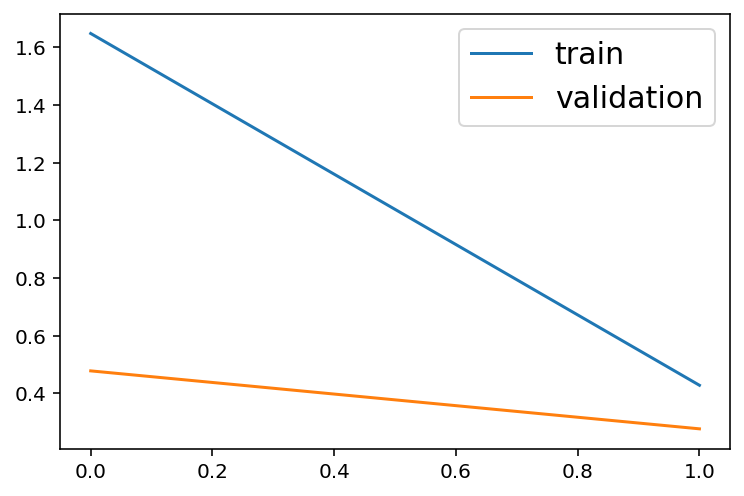

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:33, 10.01it/s]
1it [00:00,  8.85it/s]


Epoch None valid_loss: 0.2522383943375931
total inference time for this data is: 393.722511 secs
###############################################


total token count: 1059069
_corr2corr:965978, _corr2incorr:23081, _incorr2corr:46416, _incorr2incorr:23594
accuracy is 0.9559282728509663
word correction rate is 0.6629910012855307
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.63it/s]



Epoch None valid_loss: 0.17767394902092395
total inference time for this data is: 11.712510 secs
###############################################


total token count: 33473
_corr2corr:31001, _corr2incorr:462, _incorr2corr:1451, _incorr2incorr:559
accuracy is 0.9694978042004003
word correction rate is 0.7218905472636816
###############################################
------------------------- In epoch: 3 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3875 || batch_loss: 0.2468 || avg_batch_loss: 0.2551 || batch_acc: 0.9631 || avg_batch_acc: 0.9631 
Epoch 3 train_loss: 0.2550582079029167
Percent: [----------------------------->] 100% || batch_time: 0.1042 || batch_loss: 0.1796 || avg_batch_loss: 0.2165 || batch_acc: 0.9567 || avg_batch_acc: 0.9505 
Epoch 3 valid_loss: 0.21654500685789266


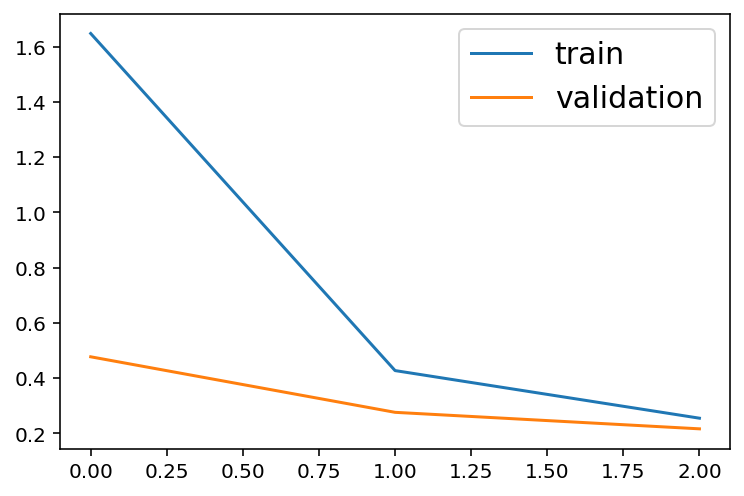

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:37,  9.93it/s]
1it [00:00,  8.72it/s]


Epoch None valid_loss: 0.2171207418321686
total inference time for this data is: 397.062123 secs
###############################################


total token count: 1059069
_corr2corr:970299, _corr2incorr:18760, _incorr2corr:47238, _incorr2incorr:22772
accuracy is 0.960784424810848
word correction rate is 0.6747321811169833
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.58it/s]



Epoch None valid_loss: 0.15581625371728794
total inference time for this data is: 11.778604 secs
###############################################


total token count: 33473
_corr2corr:31069, _corr2incorr:394, _incorr2corr:1458, _incorr2incorr:552
accuracy is 0.9717384160368058
word correction rate is 0.7253731343283583
###############################################
------------------------- In epoch: 4 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3754 || batch_loss: 0.2431 || avg_batch_loss: 0.1792 || batch_acc: 0.9698 || avg_batch_acc: 0.9698 
Epoch 4 train_loss: 0.17924296345675217
Percent: [----------------------------->] 100% || batch_time: 0.1041 || batch_loss: 0.1636 || avg_batch_loss: 0.1927 || batch_acc: 0.9636 || avg_batch_acc: 0.9541 
Epoch 4 valid_loss: 0.192746173939395


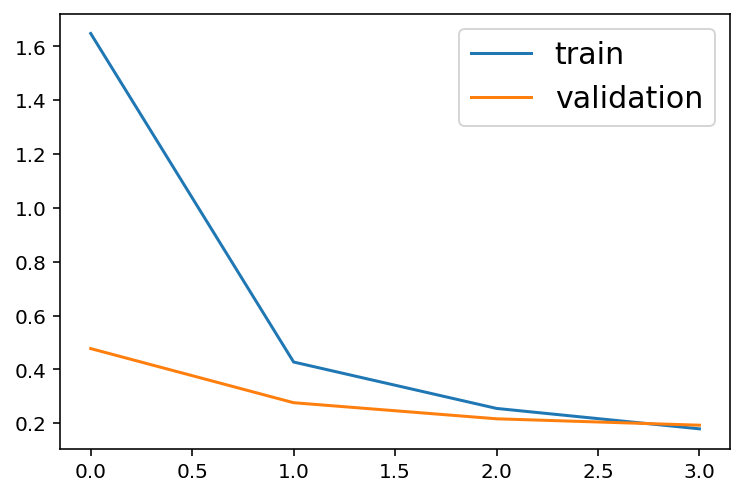

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:32, 10.03it/s]
1it [00:00,  8.55it/s]


Epoch None valid_loss: 0.2056597111058043
total inference time for this data is: 392.781250 secs
###############################################


total token count: 1059069
_corr2corr:970288, _corr2incorr:18771, _incorr2corr:47631, _incorr2incorr:22379
accuracy is 0.961145118967697
word correction rate is 0.6803456649050136
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.68it/s]



Epoch None valid_loss: 0.14534463331398398
total inference time for this data is: 11.646978 secs
###############################################


total token count: 33473
_corr2corr:31045, _corr2incorr:418, _incorr2corr:1475, _incorr2incorr:535
accuracy is 0.971529292265408
word correction rate is 0.7338308457711443
###############################################
------------------------- In epoch: 5 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4287 || batch_loss: 0.1526 || avg_batch_loss: 0.1361 || batch_acc: 0.9800 || avg_batch_acc: 0.9800 
Epoch 5 train_loss: 0.1361429605611683
Percent: [----------------------------->] 100% || batch_time: 0.1053 || batch_loss: 0.1528 || avg_batch_loss: 0.1858 || batch_acc: 0.9590 || avg_batch_acc: 0.9557 
Epoch 5 valid_loss: 0.1858339706736789


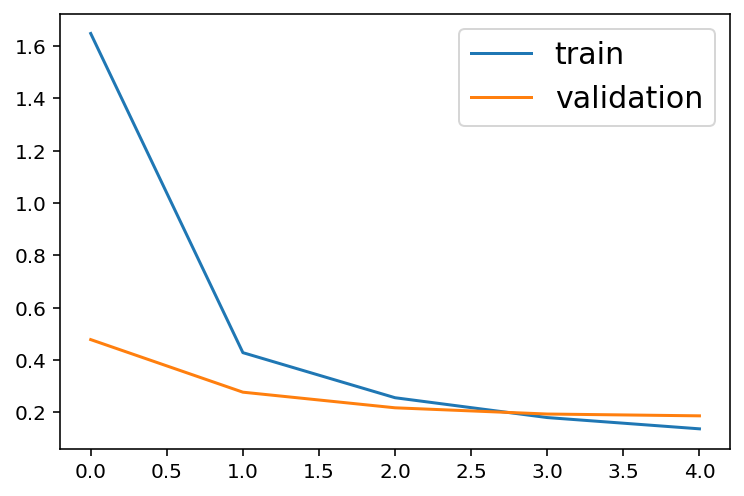

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:34,  9.99it/s]
1it [00:00,  8.86it/s]


Epoch None valid_loss: 0.20239264168321663
total inference time for this data is: 394.631118 secs
###############################################


total token count: 1059069
_corr2corr:972596, _corr2incorr:16463, _incorr2corr:47627, _incorr2incorr:22383
accuracy is 0.9633206146152895
word correction rate is 0.68028853020997
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.64it/s]



Epoch None valid_loss: 0.15007486902546174
total inference time for this data is: 11.699027 secs
###############################################


total token count: 33473
_corr2corr:31059, _corr2incorr:404, _incorr2corr:1472, _incorr2incorr:538
accuracy is 0.9718579153347474
word correction rate is 0.7323383084577114
###############################################
------------------------- In epoch: 6 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3916 || batch_loss: 0.1015 || avg_batch_loss: 0.1103 || batch_acc: 0.9910 || avg_batch_acc: 0.9910 
Epoch 6 train_loss: 0.11034158552809871
Percent: [----------------------------->] 100% || batch_time: 0.1048 || batch_loss: 0.1667 || avg_batch_loss: 0.1807 || batch_acc: 0.9658 || avg_batch_acc: 0.9573 
Epoch 6 valid_loss: 0.18073089540318807


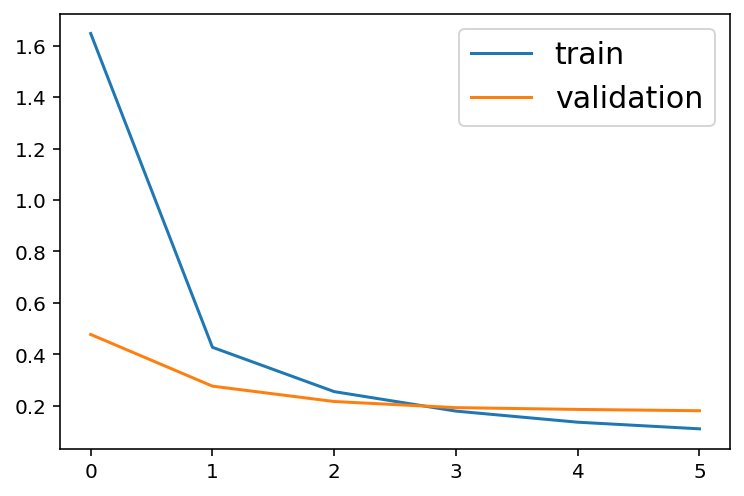

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:33, 10.01it/s]
1it [00:00,  8.97it/s]


Epoch None valid_loss: 0.20494782321809193
total inference time for this data is: 393.577739 secs
###############################################


total token count: 1059069
_corr2corr:971902, _corr2incorr:17157, _incorr2corr:48028, _incorr2incorr:21982
accuracy is 0.963043956531633
word correction rate is 0.6860162833880874
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.69it/s]



Epoch None valid_loss: 0.14399331000329244
total inference time for this data is: 11.642846 secs
###############################################


total token count: 33473
_corr2corr:31091, _corr2incorr:372, _incorr2corr:1489, _incorr2incorr:521
accuracy is 0.9733217817345323
word correction rate is 0.7407960199004975
###############################################
------------------------- In epoch: 7 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3680 || batch_loss: 0.0744 || avg_batch_loss: 0.0927 || batch_acc: 0.9869 || avg_batch_acc: 0.9869 
Epoch 7 train_loss: 0.0926823248765224
Percent: [----------------------------->] 100% || batch_time: 0.1041 || batch_loss: 0.1653 || avg_batch_loss: 0.1828 || batch_acc: 0.9613 || avg_batch_acc: 0.9575 
Epoch 7 valid_loss: 0.18282552503171515


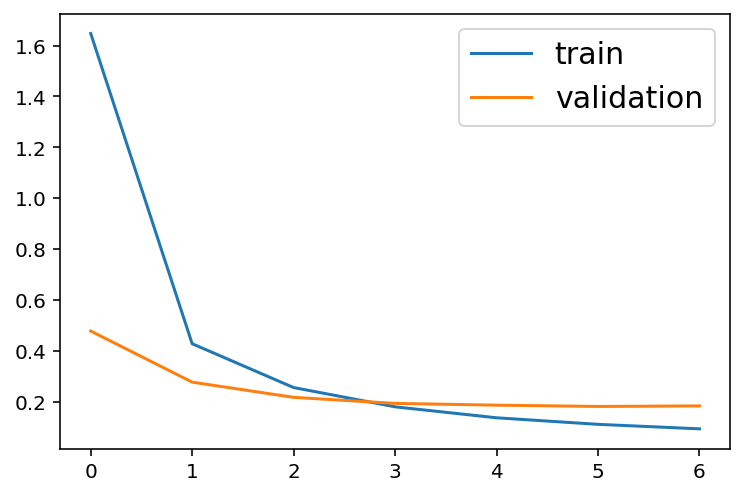

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:34,  9.98it/s]
1it [00:00,  8.90it/s]


Epoch None valid_loss: 0.21210424279176365
total inference time for this data is: 394.712425 secs
###############################################


total token count: 1059069
_corr2corr:971515, _corr2incorr:17544, _incorr2corr:47695, _incorr2incorr:22315
accuracy is 0.9623641141417604
word correction rate is 0.6812598200257106
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.61it/s]



Epoch None valid_loss: 0.15094990438163872
total inference time for this data is: 11.744748 secs
###############################################


total token count: 33473
_corr2corr:31065, _corr2incorr:398, _incorr2corr:1499, _incorr2incorr:511
accuracy is 0.9728437845427658
word correction rate is 0.7457711442786069
###############################################
------------------------- In epoch: 8 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.3630 || batch_loss: 0.0717 || avg_batch_loss: 0.0800 || batch_acc: 0.9910 || avg_batch_acc: 0.9910 
Epoch 8 train_loss: 0.0800094281087332
Percent: [----------------------------->] 100% || batch_time: 0.1044 || batch_loss: 0.1676 || avg_batch_loss: 0.1851 || batch_acc: 0.9658 || avg_batch_acc: 0.9580 
Epoch 8 valid_loss: 0.18513432653747341


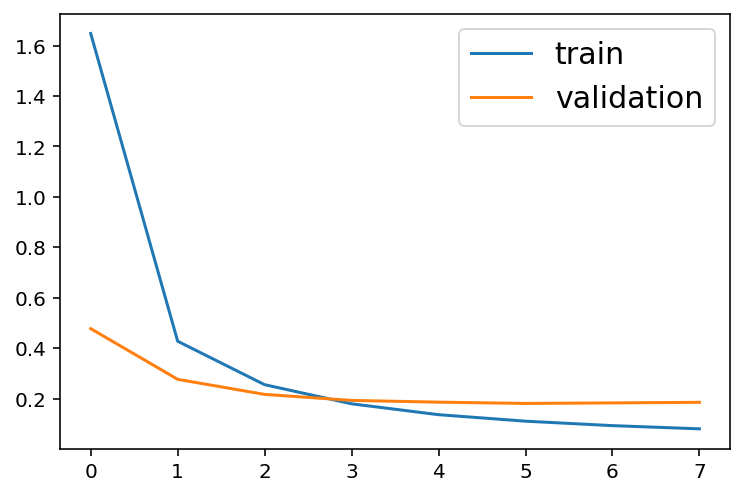

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [06:34,  9.98it/s]
1it [00:00,  8.92it/s]


Epoch None valid_loss: 0.2153535148091529
total inference time for this data is: 394.727025 secs
###############################################


total token count: 1059069
_corr2corr:971277, _corr2incorr:17782, _incorr2corr:47781, _incorr2incorr:22229
accuracy is 0.962220591859454
word correction rate is 0.6824882159691472
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:11,  8.61it/s]


Epoch None valid_loss: 0.14623867255626338
total inference time for this data is: 11.743335 secs
###############################################


total token count: 33473
_corr2corr:31045, _corr2incorr:418, _incorr2corr:1499, _incorr2incorr:511
accuracy is 0.9722462880530577
word correction rate is 0.7457711442786069
###############################################


In [23]:
MODEL_NAME = 'new_sclstmbert_input'

total_train_loss = []
total_val_loss = []

# train and eval
for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"------------------------- In epoch: {epoch_id} -------------------------")

    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    #print("train_data size: {}".format(len(train_data)))
    
    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))


    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
      
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_
        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}
        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, batch_lengths_ = sclstm_tokenize(batch_sentences, vocab)
        assert (batch_lengths_==batch_lengths).all()==True
        assert len(batch_bert_splits)==len(batch_idxs)
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)                

        # forward
        model.train()

        loss = model(batch_idxs, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        
        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()

        optimizer.step()

        # compute accuracy in numpy
        if batch_id%10000==0:

            train_acc_count += 1

            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_idxs, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)

            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)


    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)

    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    #print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):

        st_time = time.time()
        # set batch data for bert
        # batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_
        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}
        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, batch_lengths_ = sclstm_tokenize(batch_sentences, vocab)
        assert (batch_lengths_==batch_lengths).all()==True
        assert len(batch_bert_splits)==len(batch_idxs)
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)     

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)])

    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()
    
    print("||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||")
    
    predicted_result = model_inference(model, test_data_60k, 1, DEVICE, 16, vocab)

    print("||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||")

    predicted_result = model_inference(model, test_data_jfleg, 1, DEVICE, 16, vocab)
  